# IRIS PROJECT 


In [83]:
#third party imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets

In [3]:
sns.set()

# LOAD DATA 


In [4]:
#USING SCIKIT-LEARN 
data = datasets.load_iris()

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# What to solve?
use the attrs (sepal length and width and the petal length and width to predict if iris flower is (seatosa or versocolor or virginica)

multi-class classification 

# Pandas DataFrame from the data 

In [9]:
df = pd.DataFrame(data["data"],columns= data["feature_names"])

In [10]:
df["target"] = data["target"]

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


 # Basic descritpive stats

In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


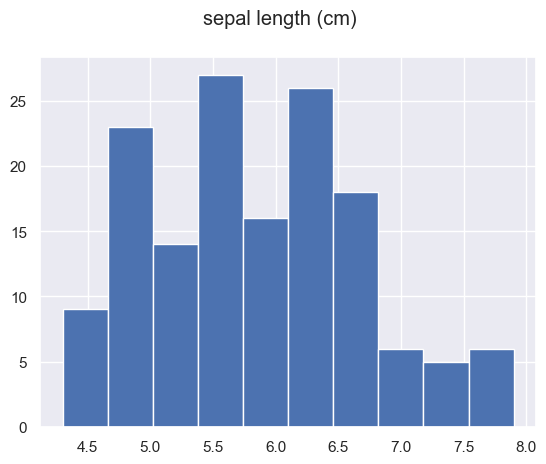

In [13]:
col = "sepal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

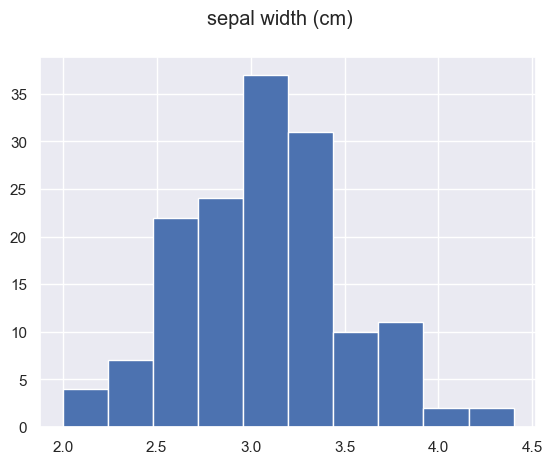

In [14]:
col = "sepal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

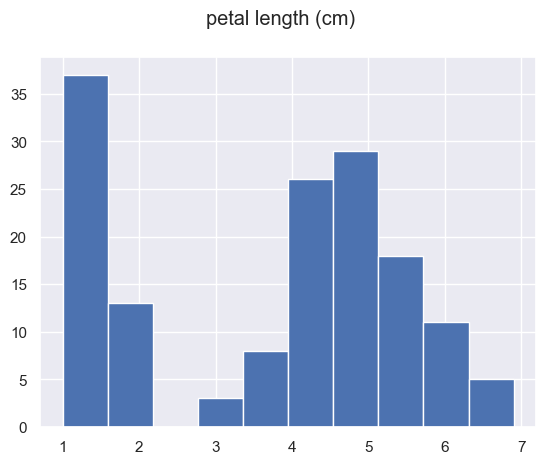

In [15]:
col = "petal length (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

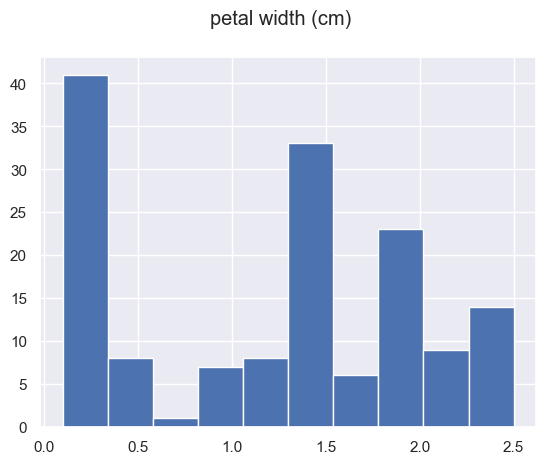

In [16]:

col = "petal width (cm)"
df[col].hist()
plt.suptitle(col)
plt.show()

# Realtions 

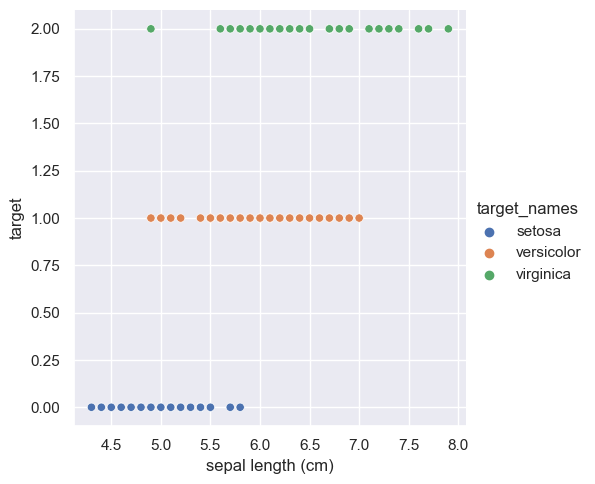

In [21]:
col = "sepal length (cm)"
sns.relplot(x = col , y = "target" , hue = "target_names",data =df)

In [22]:
data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
df["target_names"] = df["target"].map({0 :"setosa", 1 : "versicolor", 2: "virginica"})

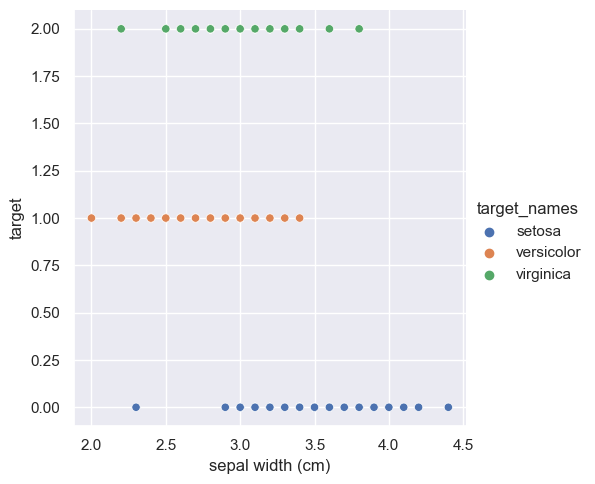

In [24]:
col = "sepal width (cm)"
sns.relplot(x = col , y = "target" , hue = "target_names",data =df)

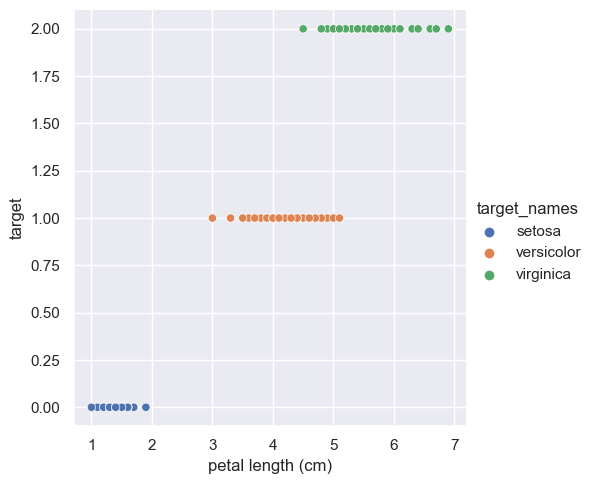

In [25]:
col = "petal length (cm)"
sns.relplot(x = col , y = "target" , hue = "target_names",data =df)

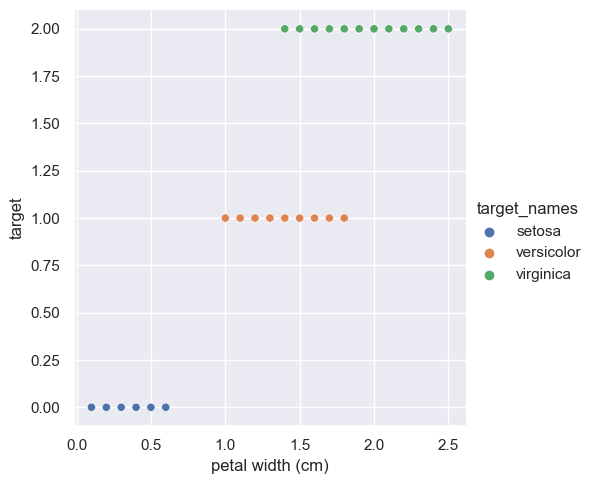

In [26]:
col = "petal width (cm)"
sns.relplot(x = col , y = "target" , hue = "target_names",data =df)

# EDA - Pair-plots

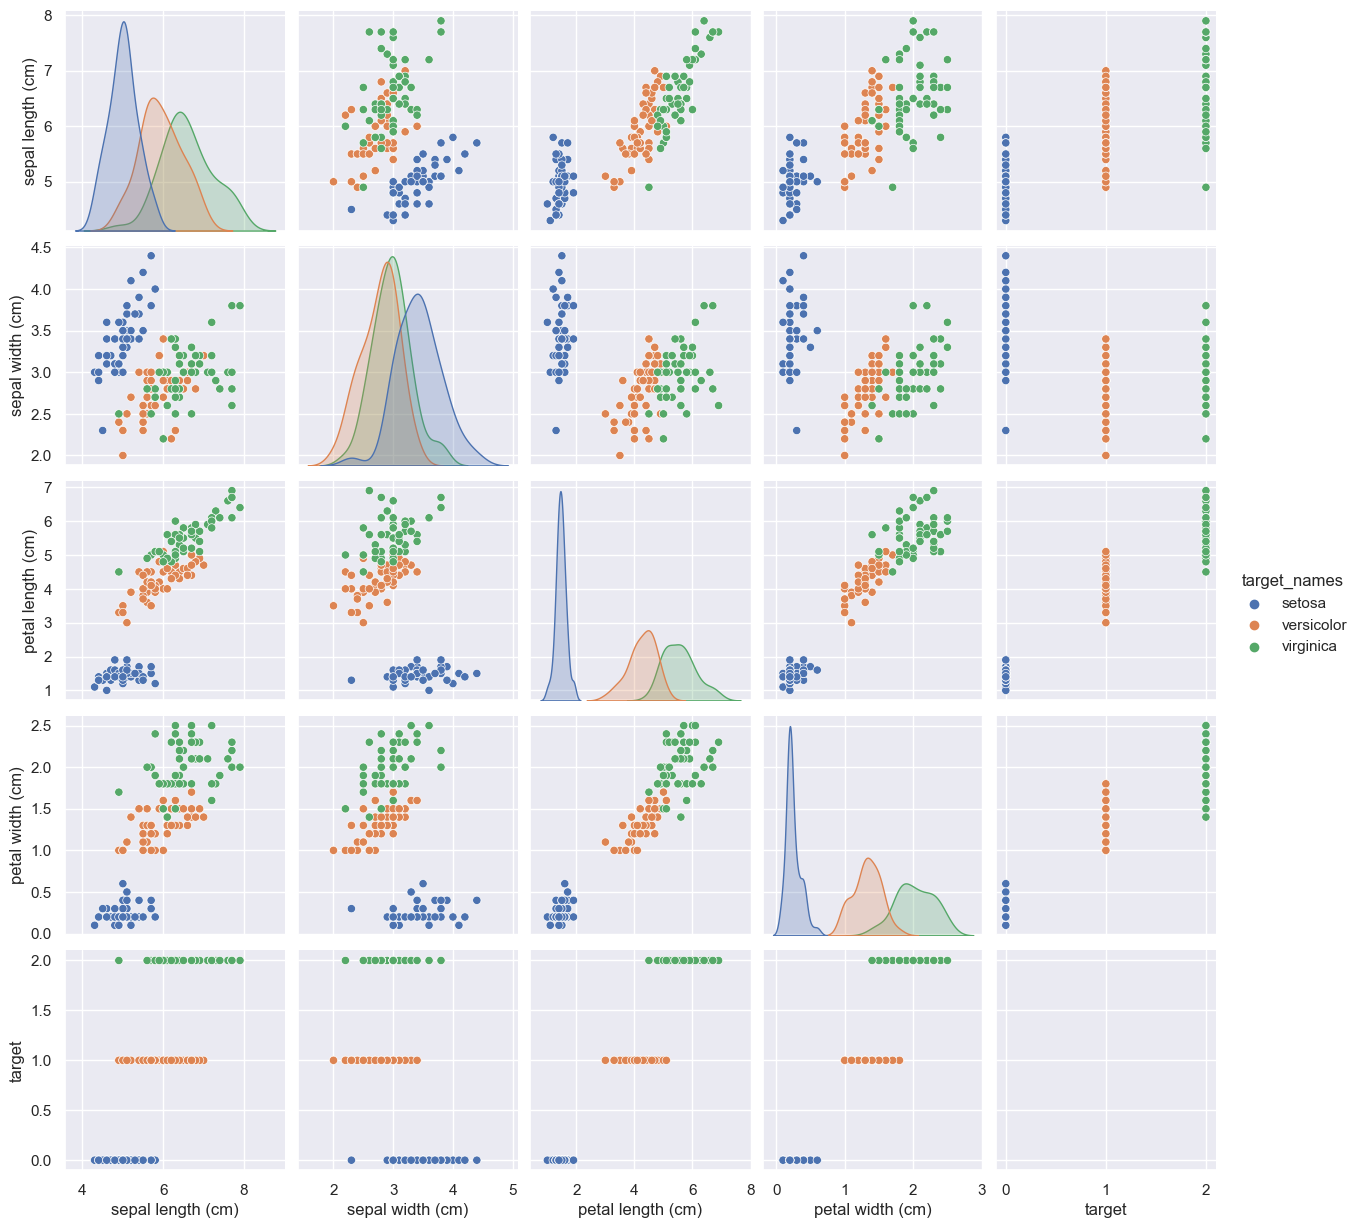

In [27]:
sns.pairplot(df, hue ="target_names") 

# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split 

In [29]:
df_train, df_test = train_test_split(df, test_size= 0.25)


In [30]:
df_train.shape

(112, 6)

In [31]:
df_test.shape

(38, 6)

# Prepare for modling 
split data back out into Numpy arrays


In [32]:
x_train = df_train.drop(columns=["target","target_names"]).values
y_train = df_train["target"].values

In [33]:
x_train.shape


(112, 4)

In [34]:
y_train.shape

(112,)

# First - Manual-Modling
simple-baseline

In [35]:
def single_feature(petal_length):
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else: 
        return 2 

In [36]:
df_train["petal length (cm)"].values 

array([1.3, 1.2, 4.7, 5.2, 5.8, 5.8, 5.7, 5.5, 1.3, 4.2, 1.4, 3.9, 4.5,
       5.6, 5. , 3. , 1.3, 4. , 4.4, 1.9, 1.5, 6.7, 4.6, 4.9, 1.4, 1.1,
       1.5, 5.7, 3.8, 5. , 5.5, 5.4, 4.5, 1.6, 3.9, 6.6, 1.5, 4.5, 5.7,
       5.9, 1.5, 5.1, 1.4, 6.4, 1.6, 4.9, 1.5, 1.5, 1.4, 4.5, 4.9, 4. ,
       5.3, 4.1, 4.2, 5.1, 3.6, 4.9, 1.6, 5.1, 1.4, 1.6, 5.6, 4.5, 1.4,
       4.7, 4.8, 4.5, 5.9, 4.2, 6.9, 1.5, 6. , 4.2, 4.4, 5.6, 4.5, 4.6,
       6.7, 5.1, 5.2, 4. , 4.4, 5.8, 1.4, 4.8, 5.3, 4.3, 5.5, 1.4, 1.4,
       4.4, 1.7, 3.5, 1.5, 1.4, 1.4, 1.3, 1.5, 6.1, 1.2, 4.5, 5. , 5.1,
       6. , 3.9, 4.3, 5.4, 5.6, 4.9, 1. , 4.8])

In [37]:
x_train[:,2]

array([1.3, 1.2, 4.7, 5.2, 5.8, 5.8, 5.7, 5.5, 1.3, 4.2, 1.4, 3.9, 4.5,
       5.6, 5. , 3. , 1.3, 4. , 4.4, 1.9, 1.5, 6.7, 4.6, 4.9, 1.4, 1.1,
       1.5, 5.7, 3.8, 5. , 5.5, 5.4, 4.5, 1.6, 3.9, 6.6, 1.5, 4.5, 5.7,
       5.9, 1.5, 5.1, 1.4, 6.4, 1.6, 4.9, 1.5, 1.5, 1.4, 4.5, 4.9, 4. ,
       5.3, 4.1, 4.2, 5.1, 3.6, 4.9, 1.6, 5.1, 1.4, 1.6, 5.6, 4.5, 1.4,
       4.7, 4.8, 4.5, 5.9, 4.2, 6.9, 1.5, 6. , 4.2, 4.4, 5.6, 4.5, 4.6,
       6.7, 5.1, 5.2, 4. , 4.4, 5.8, 1.4, 4.8, 5.3, 4.3, 5.5, 1.4, 1.4,
       4.4, 1.7, 3.5, 1.5, 1.4, 1.4, 1.3, 1.5, 6.1, 1.2, 4.5, 5. , 5.1,
       6. , 3.9, 4.3, 5.4, 5.6, 4.9, 1. , 4.8])

In [38]:
manual_y = np.array([single_feature(val) for val in x_train[:,2]])

In [39]:
manual_accuracy = np.mean(manual_y == y_train)

In [40]:
print(f"Manual model accuracy: {manual_accuracy * 100:.2f}")

Manual model accuracy: 95.54


# Second Modling - Logistic Regression 

In [41]:
from sklearn.linear_model import LogisticRegression 

In [42]:
model = LogisticRegression()

### using validition set 

In [43]:
xt , xv , yt , yv = train_test_split(x_train,y_train , test_size= 0.25)

In [44]:
xt.shape


(84, 4)

In [45]:
xv.shape

(28, 4)

In [80]:
model.fit(xt,yt)

LogisticRegression(C=4, max_iter=200)

In [47]:
model.score(xv,yv)

1.0

### using cross validation 

In [48]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [49]:
model = LogisticRegression(max_iter = 200 )

In [50]:
accuracies = cross_val_score(model,x_train,y_train,cv = 5)

In [51]:
np.mean(accuracies)

0.9822134387351777

# Misclassfication 

In [52]:
y_predd= cross_val_predict(model,x_train,y_train,cv= 5)

In [53]:
predicted_correctly_mask = y_predd == y_train


In [54]:
x_train[predicted_correctly_mask]

array([[4.4, 3.2, 1.3, 0.2],
       [5.8, 4. , 1.2, 0.2],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.2, 2. ],
       [6.7, 2.5, 5.8, 1.8],
       [7.2, 3. , 5.8, 1.6],
       [6.7, 3.3, 5.7, 2.1],
       [6.5, 3. , 5.5, 1.8],
       [5.5, 3.5, 1.3, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [5.5, 4.2, 1.4, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [6.1, 2.6, 5.6, 1.4],
       [5.7, 2.5, 5. , 2. ],
       [5.1, 2.5, 3. , 1.1],
       [5.4, 3.9, 1.3, 0.4],
       [5.8, 2.6, 4. , 1.2],
       [6.6, 3. , 4.4, 1.4],
       [4.8, 3.4, 1.9, 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [6.5, 2.8, 4.6, 1.5],
       [6.3, 2.5, 4.9, 1.5],
       [5.1, 3.5, 1.4, 0.3],
       [4.3, 3. , 1.1, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [6.9, 3.2, 5.7, 2.3],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.5, 5. , 1.9],
       [6.8, 3. , 5.5, 2.1],
       [6.9, 3.1, 5.4, 2.1],
       [6. , 2.9, 4.5, 1.5],
       [4.7, 3.2, 1.6, 0.2],
       [5.8, 2.7, 3.9, 1.2],
       [7.6, 3

In [55]:
not_predicted_correctly = ~predicted_correctly_mask

In [56]:
x_train[not_predicted_correctly]

array([[4.9, 2.5, 4.5, 1.7],
       [6.7, 3. , 5. , 1.7]])

In [57]:
df_predictions = df_train.copy()

In [58]:
df_predictions["correct_predictions"] = predicted_correctly_mask

In [59]:
df_predictions["prediction"] = y_predd

In [60]:
df_predictions["perdection_label"] = df_predictions["prediction"].map({0:"seatosa",1 :"versicolor",2:"virginica" })

In [61]:
df_predictions.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,correct_predictions,prediction,perdection_label
42,4.4,3.2,1.3,0.2,0,setosa,True,0,seatosa
14,5.8,4.0,1.2,0.2,0,setosa,True,0,seatosa
56,6.3,3.3,4.7,1.6,1,versicolor,True,1,versicolor
147,6.5,3.0,5.2,2.0,2,virginica,True,2,virginica
108,6.7,2.5,5.8,1.8,2,virginica,True,2,virginica


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

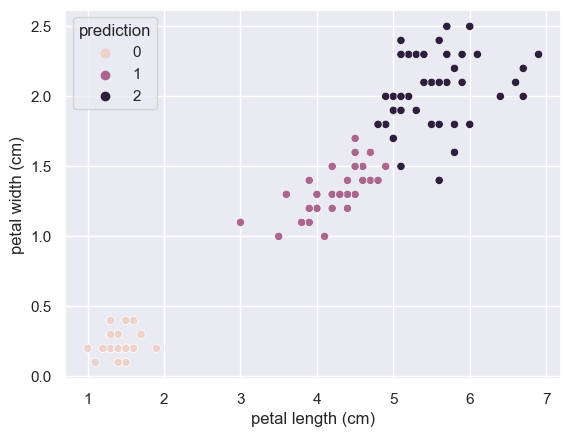

In [62]:
sns.scatterplot(x="petal length (cm)", y = "petal width (cm)", hue = "prediction", data = df_predictions)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

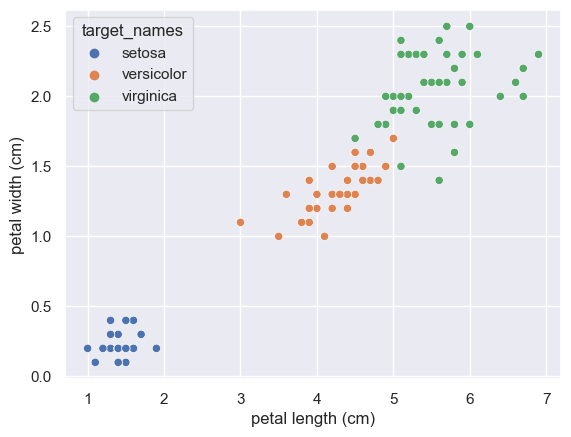

In [63]:

sns.scatterplot(x="petal length (cm)", y = "petal width (cm)", hue = "target_names", data = df_predictions)


In [64]:
def plot_predictions(df_predictions, x_axis , y_axis):
    fig, axs = plt.subplots(2,2,figsize = (10,10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis,y=y_axis,hue="prediction",data = df_predictions , ax =axs[0])
    sns.scatterplot(x=x_axis,y=y_axis,hue="target_names",data = df_predictions , ax =axs[1])
    sns.scatterplot(x=x_axis,y=y_axis,hue="correct_predictions",data = df_predictions , ax =axs[2])
    plt.show()

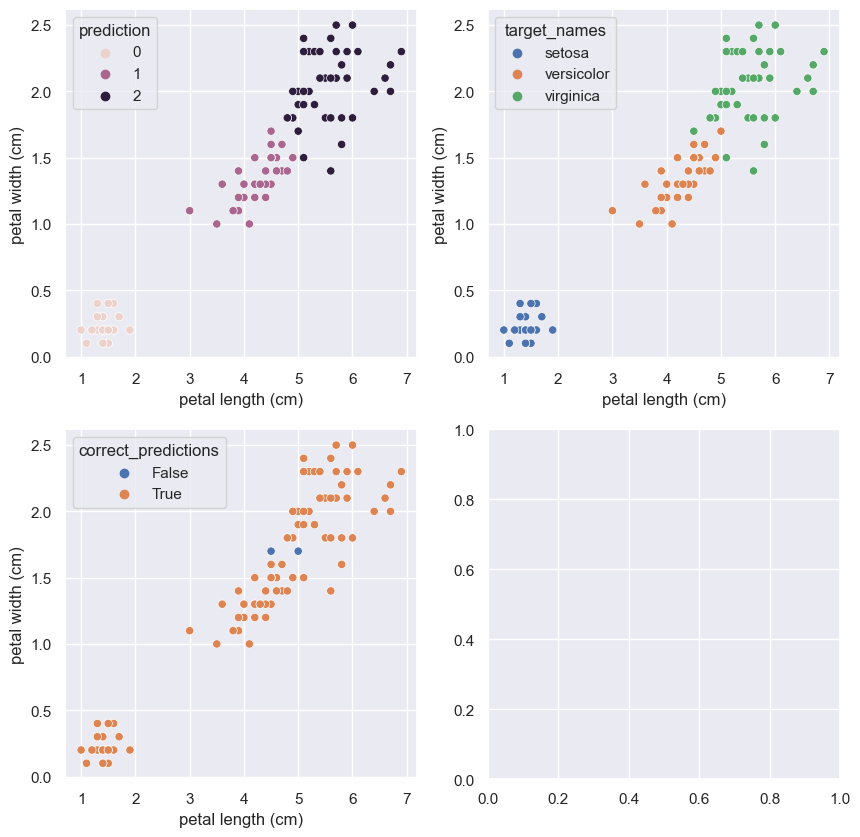

In [65]:
plot_predictions(df_predictions,"petal length (cm)","petal width (cm)")

 # Model Tuning 

In [66]:
model = LogisticRegression(max_iter=200, C = 1)

In [82]:
for reg_param in (0.1 , 0.3 , 0.9 , 4 , 5 ,6,8,7, 10 ):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C = reg_param)
    accs = cross_val_score(model , x_train , y_train ,cv = 5)
    print(f"accuracy: {np.mean(accs) * 100:.2f}%")

0.1
accuracy: 95.53%
0.3
accuracy: 97.31%
0.9
accuracy: 98.22%
4
accuracy: 98.22%
5
accuracy: 98.18%
6
accuracy: 98.18%
8
accuracy: 98.18%
7
accuracy: 98.18%
10
accuracy: 98.18%


# Final Model 

In [68]:
model = LogisticRegression(max_iter=200, C = 4)

In [69]:
x_test = df_test.drop(columns=["target","target_names"]).values
y_test = df_test["target"].values

In [70]:
y_test

array([2, 0, 1, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0,
       0, 1, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 1, 0, 0, 0])

In [71]:
x_test.shape

(38, 4)

### train our final model with full training dataset

In [72]:
model.fit(x_train,y_train)

LogisticRegression(C=4, max_iter=200)

In [73]:
y_test_pred = model.predict(x_test)

In [74]:
test_set = y_test_pred == y_test
test_set_accuracy = np.mean(test_set)

In [75]:
print(f"accuracy: {test_set_accuracy * 100:.2f}%")

accuracy: 94.74%


In [76]:
test_set_accuracy

0.9473684210526315

In [77]:
df_predictions_test = df_test.copy()
df_predictions_test["correct_predictions"] = test_set
df_predictions_test["prediction"] = y_test_pred
df_predictions_test["perdection_label"] = df_predictions_test["prediction"].map({0:"seatosa",1 :"versicolor",2:"virginica" })

In [78]:
df_predictions_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,correct_predictions,prediction,perdection_label
119,6.0,2.2,5.0,1.5,2,virginica,True,2,virginica
31,5.4,3.4,1.5,0.4,0,setosa,True,0,seatosa
58,6.6,2.9,4.6,1.3,1,versicolor,True,1,versicolor
30,4.8,3.1,1.6,0.2,0,setosa,True,0,seatosa
19,5.1,3.8,1.5,0.3,0,setosa,True,0,seatosa


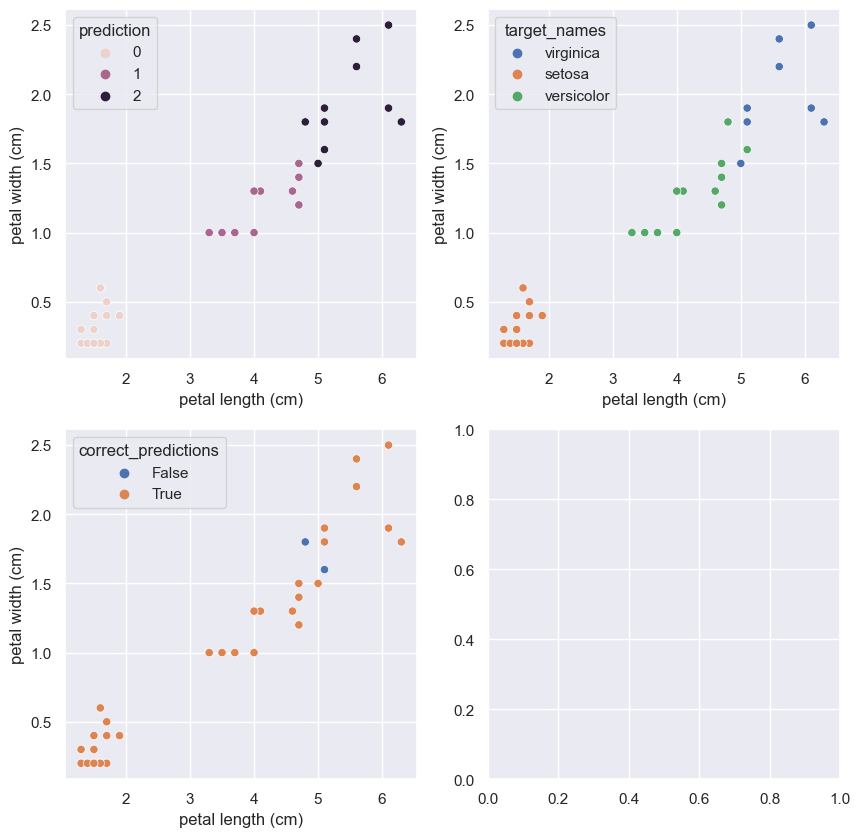

In [79]:
plot_predictions(df_predictions_test, x_axis= "petal length (cm)",y_axis="petal width (cm)")